In [1]:
from keras.datasets import mnist

2023-06-28 12:58:28.723886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 12:58:29.115891: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 12:58:29.117831: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 12:58:31.251118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test: ' + str(test_X.shape))
print('Y_test: ' + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


In [4]:
from matplotlib import pyplot

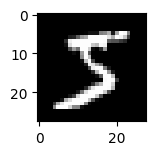

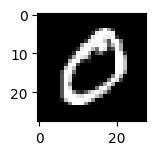

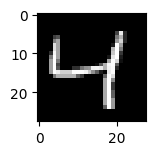

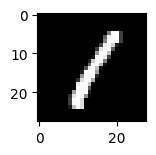

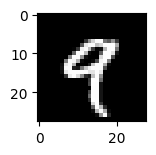

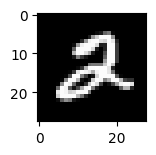

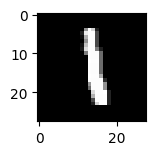

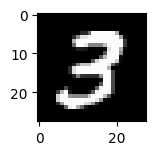

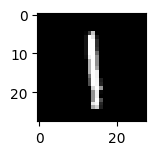

In [5]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
some_digit = train_X[50]
some_digit_image = some_digit.reshape(28, 28)

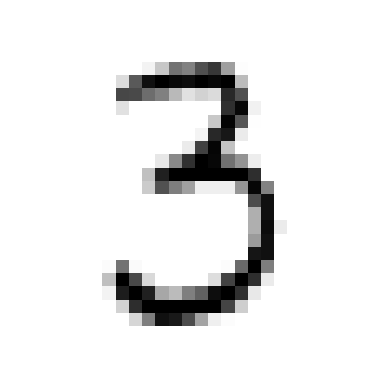

In [8]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [9]:
train_y[50]

3

In [10]:
y_train_5 = (train_y == 5)
y_test_5 = (test_y == 5)

In [11]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
nsamples, nx, ny = train_X.shape
train_X_2d = train_X.reshape((nsamples,nx*ny))

In [14]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_X_2d, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([train_X_2d[50]])

array([False])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [17]:
skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [18]:
for train_index, test_index in skfolds.split(train_X_2d, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = train_X_2d[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = train_X_2d[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9598333333333333
0.962
0.9421666666666667
0.9673333333333334
0.9541666666666667


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(sgd_clf, train_X_2d, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [21]:
from sklearn.base import BaseEstimator
import numpy as np

In [22]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [23]:
never_5_clf = Never5Classifier()

In [24]:
cross_val_score(never_5_clf, train_X_2d, y_train_5, cv=5, scoring="accuracy")

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf, train_X_2d, y_train_5, cv=5)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

In [29]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_train_5, y_train_pred)

0.7547327860613168

In [32]:
recall_score(y_train_5, y_train_pred)

0.8310274857037447

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_5, y_train_pred)

0.791044776119403

In [35]:
y_scores = sgd_clf.decision_function([train_X_2d[100]])
y_scores

array([1854.68328897])

In [36]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [37]:
y_scores = cross_val_predict(sgd_clf, train_X_2d, y_train_5, cv=3, method="decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [40]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], "b--", label="Precision")
    plt.plot(thresholds, recalls[: -1], "g-", label="Recall")
    plt.plot(precisions[95], 'g*')
    plt.grid(color='b', linestyle='--', linewidth=0.5)
    plt.legend(loc="lower right")

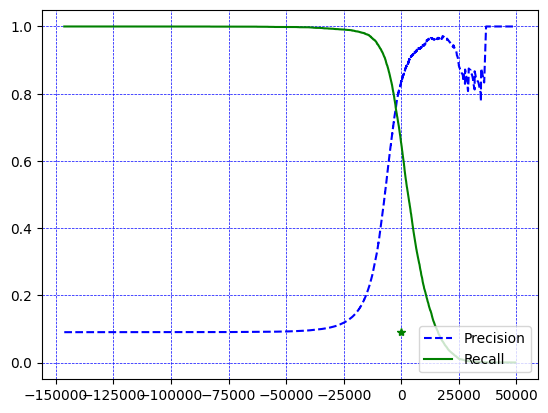

In [42]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [43]:
threshold_90_precision = thresholds[np.argmax(precisions >= .9)]

In [44]:
threshold_90_precision

3370.0194991439557

In [45]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [46]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [47]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [48]:
from sklearn.metrics import roc_curve

In [49]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid(color='b', linestyle='--', linewidth=0.5)

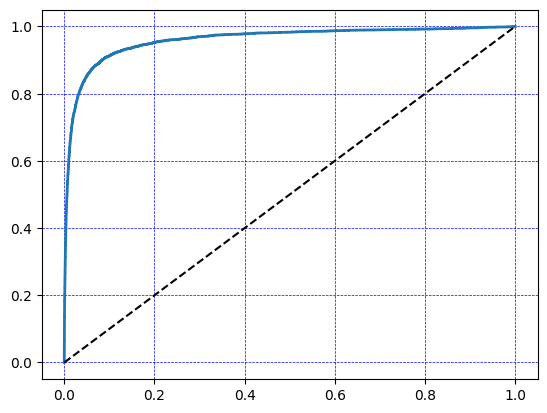

In [51]:
plot_roc_curve(fpr, tpr)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_X_2d, y_train_5, cv=3, method="predict_proba")

In [56]:
y_probas_forest[:,:]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [57]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

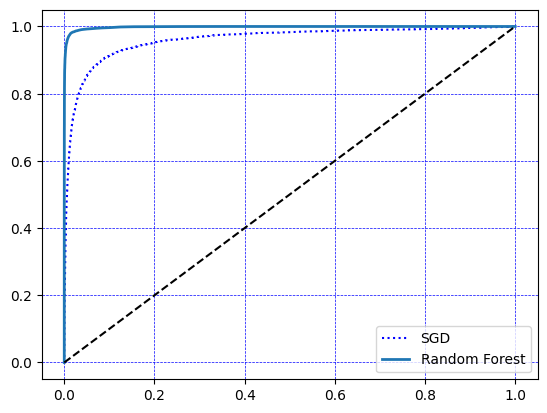

In [58]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [59]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [60]:
y_train_pred_forest = (y_scores_forest >= 0.5)

In [61]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [62]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

In [63]:
sgd_clf.fit(train_X_2d, train_y)
sgd_clf.predict([train_X_2d[100]])

array([8], dtype=uint8)

In [64]:
some_digit_scores = sgd_clf.decision_function([train_X_2d[100]])
some_digit_scores

array([[-28525.77056003, -15240.76747086,  -6675.30016507,
         -7353.83042165,  -8760.74615412,   -348.04181407,
        -12777.19183329, -11494.15436858,    631.05196772,
         -1012.21981369]])

In [65]:
from sklearn.multiclass import OneVsOneClassifier

In [66]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(train_X_2d, train_y)
ovo_clf.predict([train_X_2d[100]])

array([5], dtype=uint8)

In [67]:
len(ovo_clf.estimators_)

45

In [68]:
forest_clf.fit(train_X_2d, train_y)
forest_clf.predict([train_X_2d[100]])

array([5], dtype=uint8)

In [69]:
forest_clf.predict_proba([train_X_2d[100]])

array([[0.  , 0.  , 0.02, 0.04, 0.02, 0.81, 0.05, 0.01, 0.01, 0.04]])

In [70]:
cross_val_score(sgd_clf, train_X_2d, train_y, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X_2d.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, train_y, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [73]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, train_y, cv=3)
conf_mx = confusion_matrix(train_y, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

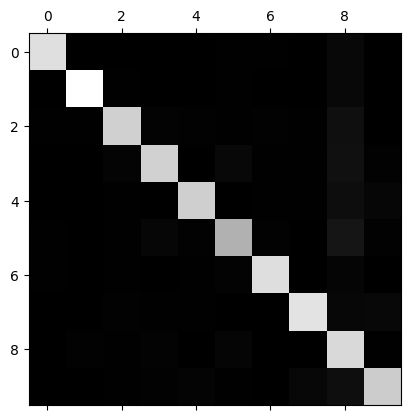

In [74]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [75]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

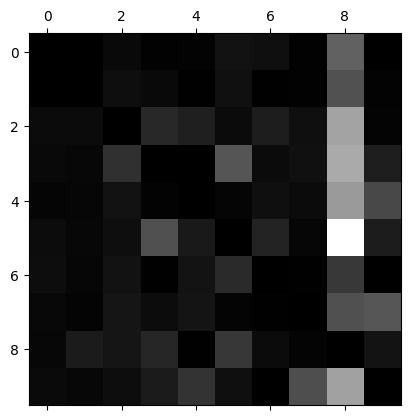

In [76]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [77]:
cl_a, cl_b = 3, 5
X_aa = train_X_2d[(train_y == cl_a) & (y_train_pred == cl_a)]
X_ab = train_X_2d[(train_y == cl_a) & (y_train_pred == cl_b)]
X_ba = train_X_2d[(train_y == cl_b) & (y_train_pred == cl_a)]
X_bb = train_X_2d[(train_y == cl_b) & (y_train_pred == cl_b)]

In [78]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

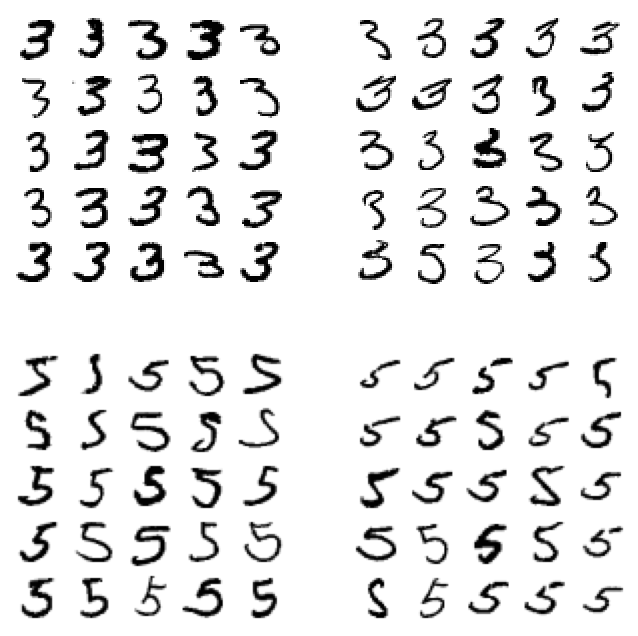

In [79]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
y_train_large = (train_y >= 7)
y_train_odd = (train_y % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [82]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X_2d, y_multilabel)

KNeighborsClassifier()

In [83]:
knn_clf.predict([train_X_2d[100]])

array([[False,  True]])

In [85]:
y_train_knn_pred = cross_val_predict(knn_clf, train_X_2d, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [88]:
nsamples, nx, ny = test_X.shape
test_X_2d = test_X.reshape((nsamples,nx*ny))

In [96]:
noise = np.random.randint(0, 100, (len(train_X_2d), 784))
X_train_mod = train_X_2d + noise
noise = np.random.randint(0, 100, (len(test_X), 784))
X_test_mod = test_X_2d + noise
y_train_mod = train_X_2d
y_test_mod = test_X_2d

In [99]:
X_train_mod.shape

(60000, 784)

In [100]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [102]:
clean_digit = knn_clf.predict([X_test_mod[100]])
clean_digit = clean_digit.reshape(28, 28)
clean_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 254,
         57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156,  71,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 254,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

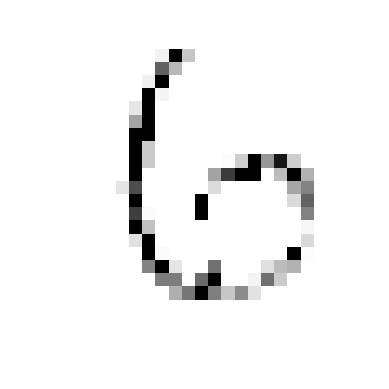

In [103]:
plt.imshow(clean_digit, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()